# Final Assignment

# Project Topic
This assignment is about using K-Nearest Neighbors in a image classfication problem. Categories are going to be added, one by one, as work progresses and the methods metrics calculated. Final goal of this work is to somehow improve the benchmark for image recognition basic algorithm, wich has an accuracy equal to 0.56. Some steps are necessary to achieve a better prediction, so the process are:

   1. Analysis of Dataset
   1. Visual check
     - Remove drawing and low resolution images from database
     - Make sure all the folders have similar number of pictures, it does not need to be the same, but needs to be close to each other   
   1. Pre-processing images
     - Convert images from RGB to Grayscale
     - Scale all images to have the same size (demand of KNN algorithm)
     - Save new Grayscale images in a new folder     
   1. Execute Sci-kit learn KNNclassfier loop manually
     - Discover best image dimension 
     - Discover best K number of neighbors     
   1. Execute Cross Validation with KNN 
     - Use k-folds equal to 10
     - Get accuracy mean     
   1. Results
     - Get the results using the best model








## 1. Dataset

The data was taken from kaggle databases website on the [animals dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals). It is a 90 animal species wich one containing 60 images. Some of the images were low quality or drawing, these species or categories were not used in this work. Images sizes varies, there is no pattern in dimensions. Others data bases were taken from kaggle website, to increment the data used.

Images are in png format, all colored, with 3 channels. Sixty images in each of ninety folders, each one containing one animal.

Two additionals data set is necessary to improve the results accuracy. [Shark dataset](https://www.kaggle.com/datasets/larusso94/shark-species) and [Dog-Cat dataset](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset)


Animals dataset - (https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals) \
Shark dataset - (https://www.kaggle.com/datasets/larusso94/shark-species) \
Cats-Dogs dataset - (https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset)

In [1]:
import glob
import cv2
import os
import PIL
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

## 2. Visual Check



Visual check consists in looking the pictures that will be used and search for low quality ones. The **FOLDERS** cointaning images that will be used in the process needs to be added in 'animal-images' folder. The word folder is highlighted due to its importance. The name of each label is taken from the folder name where the image is located and they are organized in alphabetic orders. Images from folder 'dog' are going to be labeled as dog, the same for the other species. 

In [2]:
images_path = glob.glob('animal-images/*/*.jpg')    #save all COMPLETE directorys path at 'images_path' for every image inside 'animal-images'
#os.mkdir('bw-pic')                                 #create a folder for grayscale 
#images_path2 = glob.glob('bw-pic/*.jpg')            
images_path3 = glob.glob('to_predict/*/*.jpg')      #dataset with new images to be predicted  (SHARK AND DOG) 
images_path6 = glob.glob('to_predict2/*/*.jpg')     #dataset with new images to be predicted  (SHARK, DOG AND CAT)
images_path4 = glob.glob('animal-images4/*/*.jpg')  #dataset with images to train the model (SHARK AND DOG IMAGES) 
images_path5 = glob.glob('animal-images1/*/*.jpg')  #dataset with images to train the model (SHARK, DOG AND CAT)



##  3. Pre-processing images

KNN is a simple method of machine learning, but it does not "learn" parameters, it only takes the closest data possible to what is being evaluated. Due to this method caracteristics, and the lack of memory of my computer, I converted all images into grayscale ones, as it will divide the number of integers saved in a dataframe by 3. After the conclusion of this work, an extra session will be included in the end to compare results from Grayscale images to RGB ones.

Scaling images can be a determinant step of the process. This can be done by many ways, keeping the width x height ratio, or, just squash the dimensions. Either cases can be successful, but of course, preserve the aspect ratio is perfect scenario, but not always necessary. As it takes a long time to keep the aspect ratio, I am going to do the simpler way.

The method 'get_image' was created to read the image file, save the folder name where the image is located as an object, convert it to grayscale, flatten the pixel matrix and, by the end, save it in a list.

In [3]:
#Create a black and white folder with all colored pictures
class get_image:
    def __init__(self, dsize_x, dsize_y, images_path = images_path ):
        dsize = (dsize_x, dsize_y)                                   #image dimensions
        i=0
        self.labels=[]                                               #list of labels of each image
        pix_img=list()                                               #list of pixel of each image
        self.img_height = []
        self.img_width = []                                               
        for image in images_path:
            img = cv2.imread(image) 
            self.img_height.append(img.shape[1])
            self.img_width.append(img.shape[0])
            folder=os.path.split(os.path.dirname(image))[-1]         #function to discover in wich folder it is located
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)         #convert image from rgb to grayscale
            gray_img = cv2.resize(gray_img, dsize)                   #resize grayscale image
            gray_img_pix = gray_img.flatten()                        #turn image matrix into a single line of pixels
            pix_img.append(gray_img_pix)                              
            self.labels.append(folder)
            i=i+1

        ### function to convert labels in numbers.###
        uniqueWord = [];
        self.num_lab=[]
        for elt in self.labels:
            if elt not in uniqueWord:
                uniqueWord.append(elt);
        for word in self.labels:
            self.num_lab.append(uniqueWord.index(word) + 1)
        
        
        df = pd.DataFrame(self.num_lab, columns = ['labels'])        #save numeric labels as a data frame shape(-1,1)
        self.y= df['labels']                                         #categories column
        self.X=pd.DataFrame(pix_img)                                 #matrix of random variable
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        
                

For images, the EDA consists in checking the image sizes to know if there will be a lot of distortion. An histogram is made for width and another for height. 

mean height of the images is 743.8511749347258
mean width of the images is 572.5352480417755


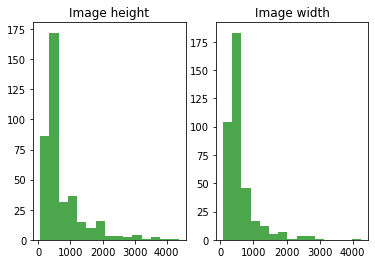

In [4]:
data = get_image(60, 60, images_path4)
fig, (ax1, ax2) = plt.subplots(1,2);
ax1.hist(data.img_height, 15, color ='green', alpha = 0.7) ; 
ax1.set_title("Image height");
ax2.hist(data.img_width, 15, color ='green', alpha = 0.7);
ax2.set_title("Image width");

print('mean height of the images is', mean(data.img_height))
print('mean width of the images is', mean(data.img_width))

## 4. Execute Sci-kit learn KNN classfier loop manually
This is a simple loop to get accuracy score predictions, where the n numbers of neighbors are incresing one in each loop. KNN is a non linear response algorithm, so it does not have a pattern. Increasing the number of neighbors not necessarily will increase accuracy score.

In [5]:
data = get_image(740, 570, images_path4)
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(data.X_train, data.y_train)
    knn.score(data.X_test, data.y_test)
    print('for k equal to %d:' % i, knn.score(data.X_test, data.y_test))




for k equal to 1: 0.5454545454545454
for k equal to 2: 0.7272727272727273
for k equal to 3: 0.6103896103896104
for k equal to 4: 0.6883116883116883
for k equal to 5: 0.6233766233766234


## 5. Execute Cross Validation with KNN
In order to determine wether the dimensions of the images in the data set will cause a substantial improvement, a more complex loop is made, where the images sides are equal and it goes from 30 to 300 pixels. The number of points analyzed are 900 and 90000 respectively. That means, if it does not change the accuracy, it is better be using smaller images, for computational reasons. If the data has large number of images, bigger images like 300 pixels side will demand large computational power as well. Inside loop computes k-fold cross validation score, for each number of neighbors, from 1 to 20.



In [6]:

score_list=list()
lst_of_lsts=[]
for j in range(30,301,30)  :
    data = get_image(j,j, images_path4 )                                              #get images with jxj dimensions from 'images_path' folder
    score_int=list()                                                                  #start a new list every loop to include the accuracy mean by knn neighbors
    print('image of side %d ' %j)
    for i in range(1,21):
        knn = KNeighborsClassifier(n_neighbors = i)                                   #instance of knn
        scores = cross_val_score(knn, data.X, data.y, cv = 15, scoring = 'accuracy')  #calculate knn accuracy score, for kfolds = 15
        score_int.append(scores.mean())                                               #save accuracy mean in a list
        if i == 20:
            lst_of_lsts.append(score_int)                                             #append the complete list, at last step, in lst_of_lsts
            score_list.append(max(score_int))                                  
            



image of side 30 
image of side 60 
image of side 90 
image of side 120 
image of side 150 
image of side 180 
image of side 210 
image of side 240 
image of side 270 
image of side 300 


To improve data visualization, used T.plot to represent all images size by each color. Starting from the smallest until the greatest one. This plot will help to choose the best image dimension, according to the accuracy results.

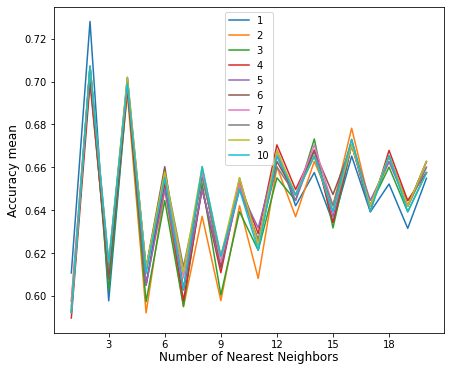

In [7]:

df2=pd.DataFrame(lst_of_lsts, index=pd.RangeIndex(start=1, stop=len(lst_of_lsts)+1, step=1), columns=range(1,21,1))


pltt = df2.T.plot(figsize=(7,6), xticks=range(1,21,1))   
pltt.set_ylabel('Accuracy mean', fontsize=12)   
pltt.set_xlabel('Number of Nearest Neighbors', fontsize=12, labelpad=1)
pltt.xaxis.set_major_locator(MaxNLocator(integer=True))

The plot shows that there is not a big improvement when using greater dimensions images. So, the analysis will be done with 60x60 images, to avoid spending a lot of time, and to explore the possibility to include more images in the dataset.

About cross validation number of folds, it will be used 10 Kfold. To check wich n neighbors is the best to this situation, the GridSearchCV hyperparameter tuning method will be used. This functions iterates over the 'n_neighbors', from 1 to 15 and the metrics that will be used with euclidean and manhattan distance. Mean accuracy and stardard deviation will be put in a table with the number of neighbors used in KNN algorithm.

- Rows 1 to 14 are the model mean test score using euclidean distance.
- Rows 15 to 29 are the model mean test score using manhattan distance.








In [8]:
data = get_image(60, 60, images_path4)

clf = GridSearchCV( KNeighborsClassifier(),{'n_neighbors' : range(1,16), 
                                            'metric' : [ 'euclidean', 'manhattan']},
                                            cv = KFold(n_splits=10, random_state=1, shuffle=True), return_train_score=False)
clf.fit(data.X, data.y)
clf.cv_results_
df = pd.DataFrame(clf.cv_results_)



In [9]:
print(df[['param_n_neighbors', 'mean_test_score', 'std_test_score']])        
print('min and max score values are', min(df['mean_test_score']), max(df['mean_test_score']))
print('min and max std values are', min(df['std_test_score']), max(df['std_test_score']))

   param_n_neighbors  mean_test_score  std_test_score
0                  1         0.590283        0.089122
1                  2         0.720715        0.097129
2                  3         0.613563        0.073559
3                  4         0.681242        0.097342
4                  5         0.584953        0.071129
5                  6         0.652362        0.089607
6                  7         0.597773        0.066318
7                  8         0.629082        0.082555
8                  9         0.623887        0.079562
9                 10         0.652497        0.073679
10                11         0.605668        0.087400
11                12         0.649865        0.091148
12                13         0.629082        0.086648
13                14         0.670783        0.067918
14                15         0.621255        0.081418
15                 1         0.658030        0.085600
16                 2         0.741835        0.074930
17                 3        

 - Euclidean Distance
    - min and max score values are 0.5849 and 0.7207
    - the standard deviation of these scores are 0.071129 and 0.097129 respectively

 - Manhattan distance
    - min and max score values are 0.642308 and 0.741835
    - the standard deviation of these scores are 0.1105 and 0.0920 respectively

Mean test score is between the range of 0.76 and 0.88. Looking at the previous table, it is possible to see that the best accuracy is obtained with K neighbors equal to 2, for both metrics. To be sure of that, a list is made to append the number of neighbors that will be optmizing the model in each image size. While from the cross validation session we had determined that the image dimensions will be 60x60, the best k neighbors will be determined by the seccond value in the list "mean_max"

In [10]:
mean_max = []                                                  #number of neighborhood for max accuracy in each image dimension
for i in range(len(lst_of_lsts)):
    max_index = lst_of_lsts[i].index(max(lst_of_lsts[i]))
    mean_max.append(max_index)

mean_max = [x+1 for x in mean_max]
print('The best K number of neighbors for the dimension size 60x60 is',mean_max[1])



The best K number of neighbors for the dimension size 60x60 is 2


## 6. Results

After deep analysis in the data and models, the number of nearest neighbors was set to 2, and the images dimensions were 60x60. A prediction in this terms led to a mean test score using cross validation equal to 0.88. Now I am going to check if predictions using new data are going to lead to a similar result. 

The new folder cointaining the images to be predicted has 20 images from each label. Each image must be inside a internal folder named with the label to be predicted.

In [11]:
data = get_image(60, 60, images_path4)
data2 = get_image(60,60, images_path3)
h=0
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'manhattan' ).fit(data.X, data.y)
for i in range(len(data2.y.tolist())):
    if knn.predict(data2.X)[i] == data2.y.tolist()[i]:
        h=h+1
        
acc = h/len(data2.y.tolist())
print(acc)

0.7435897435897436


After using new images, from other databases, the accuracy score has fallen 0.2 points to 0.74, wich is a bad result comparing to human accuracy (about 0.95). On the other hand, it had a slightly improvement when comparing to image recognition KNN accuracy benchmark for cat-dog databases(about 0.54). 

The improvement must be reached due the used images had differents backgrounds. For classification of 2 labels, the animals analyzed were Dog and Sharks. Dog pictures has multiple backgrounds, for sharks, almost every image was taken under water.
So, similar backgrounds tends to have smaller distance than differents ones.  



In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.classification_report(data2.y, knn.predict(data2.X)))
print(pd.crosstab(data2.y, knn.predict(data2.X), margins  = True, rownames=['real'], colnames=['predito'] ))
mat = confusion_matrix(data2.y, knn.predict(data2.X))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        20
           2       0.71      0.79      0.75        19

    accuracy                           0.74        39
   macro avg       0.75      0.74      0.74        39
weighted avg       0.75      0.74      0.74        39

predito   1   2  All
real                
1        14   6   20
2         4  15   19
All      18  21   39


With new image data set, the accuracy over the prediction of all images is equal to 0.74.

## Conclusion

Images back ground in many ways interfere in the results for KNN. There are other academic works that improve the KNN accuracy for image recognition. Ones suggests that background needs to be removed. I do think that for species classification, KNN is not the best model to be implemented, but it can be more effective when comparing aquatic to land animals. I would suggest using Convolutional neural network as a more effective model for this kind of problem. For datasets like MNIST, KNN would work well enough, as the images are standardized, with numbers in same size, wich makes distance comparition much more effective. 

# EXTRA - multiclass classification

Using more categories or animals species, we will probably have more difficult to correctly classify them. The way the pictures were taken was not standardized for all the pictures, that is why a bigger data set is necessary in order to keep a reasonable result. 

The algorithm could be implemented for many categories. Said so, I decided to make a multiclass classification, wich labels are Cat, Dog and Shark (1,2 and 3), using same protocol as binary classification.

In [13]:
data = get_image(60,60, images_path5)            #train model (CAT, DOG AND SHARK)
data2 = get_image(60,60, images_path6)           #to predict (CAT, DOG AND SHARK)

score_list=list()
lst_of_lsts=[]
for j in [30, 120, 210, 300]  :
    data = get_image(j,j, images_path5 )                                              #get images with jxj dimensions
    score_int=list()                                                                  #start a new list every loop to include the accuracy mean by knn neighbors
    print('image of side %d ' %j)
    for i in range(1,21):
        knn = KNeighborsClassifier(n_neighbors = i)                                   #instance of knn
        scores = cross_val_score(knn, data.X, data.y, cv = 15, scoring = 'accuracy')  #calculate knn accuracy score, for kfolds = 15
        score_int.append(scores.mean())                                               #save accuracy mean in a list
        if i == 20:
            lst_of_lsts.append(score_int)                                             #append the complete list, at last step, in lst_of_lsts
            score_list.append(max(score_int))  

image of side 30 
image of side 120 
image of side 210 
image of side 300 


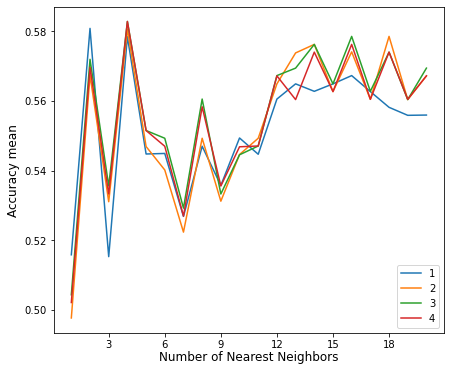

In [14]:

df2=pd.DataFrame(lst_of_lsts, index=pd.RangeIndex(start=1, stop=len(lst_of_lsts)+1, step=1), columns=range(1,21,1))


pltt = df2.T.plot(figsize=(7,6), xticks=range(1,21,1))   
pltt.set_ylabel('Accuracy mean', fontsize=12)   
pltt.set_xlabel('Number of Nearest Neighbors', fontsize=12, labelpad=1)
pltt.xaxis.set_major_locator(MaxNLocator(integer=True))

In [15]:
data = get_image(60,60, images_path5)            #train model (CHIPANZEE, DOG AND SHARK)
data2 = get_image(60,60, images_path6)           #to predict

knn = KNeighborsClassifier(n_neighbors = 2).fit(data.X, data.y)
knn.predict(data2.X)

h=0
for i in range(len(data2.y.tolist())):
    if knn.predict(data2.X)[i] == data2.y.tolist()[i]:
        h=h+1
    
acc2=h/len(data2.y.tolist())
print(acc2)

0.48333333333333334


In [16]:
data = get_image(60,60, images_path5)            #train model (CHIPANZEE, DOG AND SHARK)
data2 = get_image(60,60, images_path6)           #to predict

knn = KNeighborsClassifier(n_neighbors = 2).fit(data.X, data.y)
knn.predict(data2.X)
print(metrics.classification_report(data2.y, knn.predict(data2.X)))
print(pd.crosstab(data2.y, knn.predict(data2.X), margins  = True, rownames=['real'], colnames=['predito'] ))
mat = confusion_matrix(data2.y, knn.predict(data2.X))

              precision    recall  f1-score   support

           1       0.38      0.14      0.21        21
           2       0.43      0.50      0.47        20
           3       0.55      0.84      0.67        19

    accuracy                           0.48        60
   macro avg       0.45      0.49      0.45        60
weighted avg       0.45      0.48      0.44        60

predito  1   2   3  All
real                   
1        3  11   7   21
2        4  10   6   20
3        1   2  16   19
All      8  23  29   60


Dogs and cats are easy to be mistaken as they format are similar, and the background that they use to appear at is similar in many ways and tottaly different from shark images background. That can cause a reduction in accuracy of the model.